In [1]:
import torch
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
import matplotlib as mpl
import os
import gc
import pandas as pd
import csv
from numpy import *
from torch.utils.tensorboard import SummaryWriter
from datetime import date
import random

In [2]:
## different amino acids
amino_acid = \
  ['A', 'V', 'F', 'I', 'L','D','E','K','S','T','Y','C','N','Q', 'P','M', 'R', 'H', 'W', 'G','X'] # X is the undetermined amino acid, so total length is 21
print('Number of unique amino acids are', np.shape(np.unique(amino_acid))[0])

np.save('../model/categorical_variables', amino_acid)

def onehotseq(sequence):
  seq_len = len(sequence)
  seq_en = np.zeros(( seq_len, np.shape(amino_acid)[0]))
  for i in range(seq_len):
      idx = amino_acid.index(sequence[i])
      seq_en[i,idx] = 1
  return seq_en

Number of unique amino acids are 21


**All Dataset**

In [3]:
data = pd.read_excel('data.xlsx')
data = data.to_numpy()
seq_length = np.zeros((len(data),))

for i in range(len(data)):
    temp = list(data[i,0])
    seq_length[i] = len(temp)

output_y = data[:,1].astype(float32)
raw_seq = data[:,0]

ohe = np.zeros((raw_seq.shape[0], int(max(seq_length)), len(amino_acid)))
for i in range(ohe.shape[0]): 
    l = int(seq_length[i])
    ohe[i,0:l,:] = onehotseq(list(raw_seq[i]))

print(raw_seq[10])
print(ohe[10,4])

GGAGQGGYGGLGSQGAGRGGLGGQKIKIKIKIKIKIKQGGYGGLGSQGAGRGGLGGQGAG
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


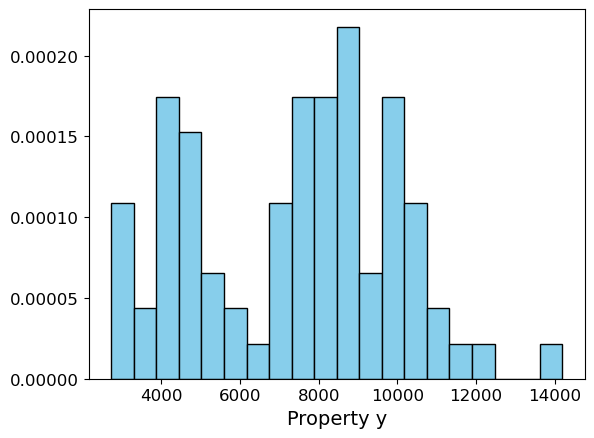

In [4]:
plt.hist(output_y, bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Property y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Divide Dataset**

In [5]:
all_ex = np.arange(ohe.shape[0])
x_train, x_test, _, _ = train_test_split( all_ex, all_ex, test_size=0.1875,random_state=50) ##[10,100,1000]
x_train, x_valid, _, _ = train_test_split( x_train, x_train, test_size=0.2307,random_state=100)

print('Train',x_train.shape)
print('Test' ,x_test.shape)
print('Valid',x_valid.shape)

print(ohe[x_train].shape, seq_length[x_train].shape, output_y[x_train].shape)

Train (50,)
Test (15,)
Valid (15,)
(50, 60, 21) (50,) (50,)


In [6]:
np.save('./x_train', ohe[x_train])
np.save('./len_train', seq_length[x_train])
np.save('./y_train', output_y[x_train])

np.save('./x_valid', ohe[x_valid])
np.save('./len_valid', seq_length[x_valid])
np.save('./y_valid', output_y[x_valid])

np.save('./x_test', ohe[x_test])
np.save('./len_test', seq_length[x_test])
np.save('./y_test', output_y[x_test])


print(max(seq_length), min(seq_length))

60.0 60.0
